## Random Forest


* Ensemble Learning
    * Taking multiple ML algorithms and put together to become one.
    * Random Forest uses multiple decision tree for the prediction.

1. Pick at random K data points from the training set.
2. Build the Decision Tree associated to these K data points.
3. Choose the number Ntree of trees you want to build and repeat steps 1 & 2.
4. For a new data point, make each one of your Ntree trees predict the category to which the data points belongs, and assign the new data point to the category that wins the majority of the votes.

<hr />

### Implementing model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
df = pd.read_csv('data/social_Network_ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Splitting the data

In [28]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Model Training

In [30]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)
cls = RandomForestClassifier(n_estimators=100, criterion='entropy')
cls.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

### Predictions

In [31]:
y_preds = cls.predict(X_test)

### Evaluations

In [32]:
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

accuracy_score(y_test, y_preds)

0.9375

In [20]:
confusion_matrix(y_test, y_preds)

array([[55,  3],
       [ 2, 20]], dtype=int64)

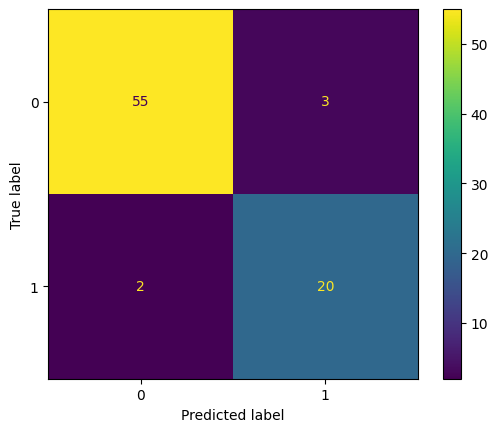

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [22]:
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.964912,0.869565,0.9375,0.917239,0.938692
recall,0.948276,0.909091,0.9375,0.928683,0.937500
f1-score,0.956522,0.888889,0.9375,0.922705,0.937923
support,58.000000,22.000000,0.9375,80.000000,80.000000
